# Recurrent Neural Networks (RNN)

[ RNN 개념 이해를 위한 링크 출처 ]  https://www.youtube.com/watch?v=PahF2hZM6cs&t=294s

# 일대다(One to Many)




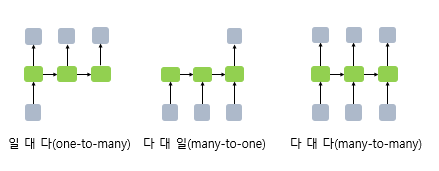

예를 들어서, 한 이미지 입력에 대해서 사진의 제목을 출력하는 이미지(Image Captioning) 작업에 사용할 수 있다.

# 다대일(Many to One)

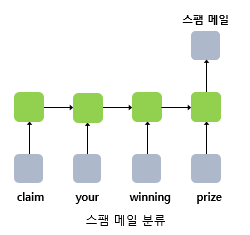

메일에 들어 있는 문장이나 메일의 제목을 입력으로 받아 정상 메일인지 스팸 메일인지 판별하는 스팸 메일 분류 또는 입력 문서가 긍정적인지 부정적인지를 판별하는 감성 분류(Sentiment Classification) 등에 사용할 수 있다.

# 다대다(Many to Many)

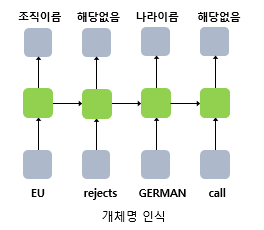

사용자가 문장을 입력하면, 대답 문장을 출력하는 챗봇 또는 입력 문장으로부터 번역된 문장을 출력하는 번역기, 아래에서 설명할 품사 태깅과 같은 작업을 수행할 수 있다.

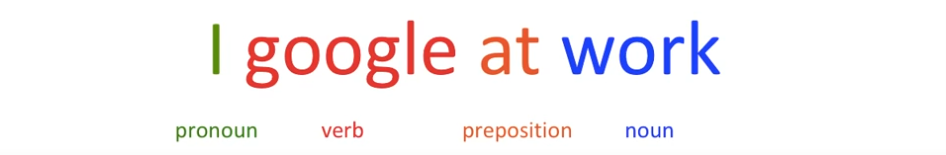

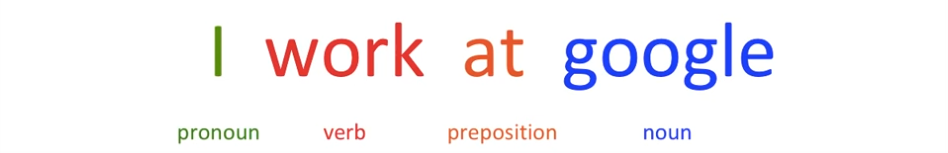

- 첫번째 문장에서는 google이 동사, work가 명사
- 두번째 문장에서는 work가 동사, google이 명사

이것을 알 수 있는 방법은 우리가 대명사 뒤에 왔으니까 동사이겠구나
전치사 뒤에 왔으니까 명사겠구나 라고 생각한다.

이러한 **추론 과정**을 RNN이라고 할 수 있다.



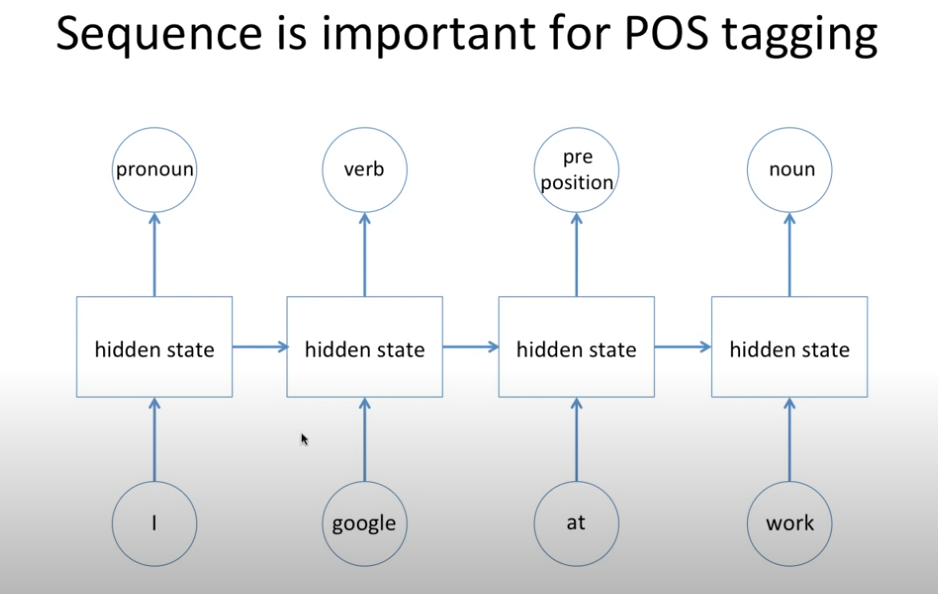

순서가 중요하다고 써있는 것처럼,

- google 이 I 다음 위치에 왔으니까 verb일 확률이 높겠구나.
- work 가 at 뒤에 왔으니까 noun일 확률이 높겠구나.

라고 추론할 수 있다.

이 값들을 x, y, h 로 바꾸면,

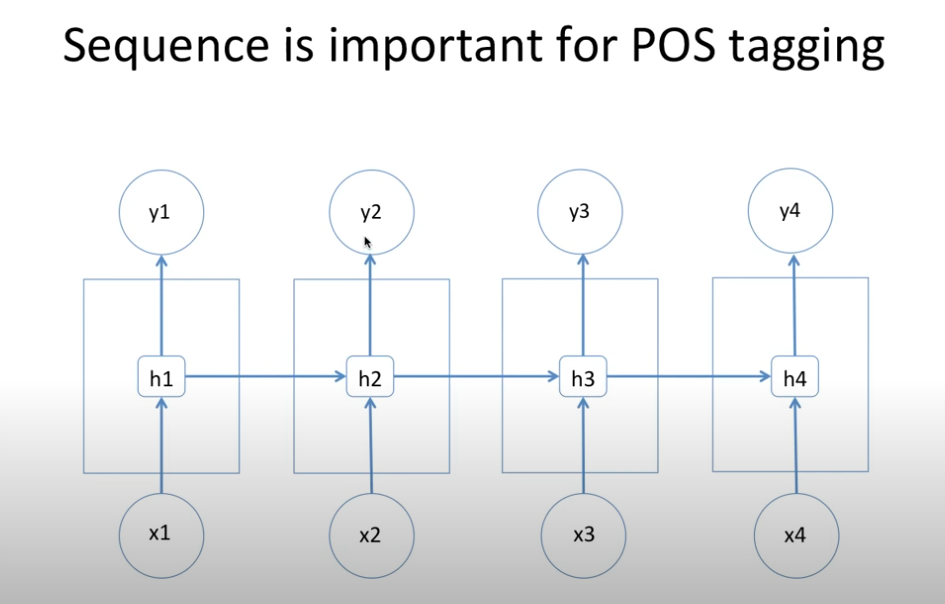

여기서 주목해야 할 부분은

- h1에서 값이 y1(output)과 h2(state) 나갈때, 동일한 값으로 나간다는 것이다.

- 다른 h(state)들도 동일하다는 것이다.

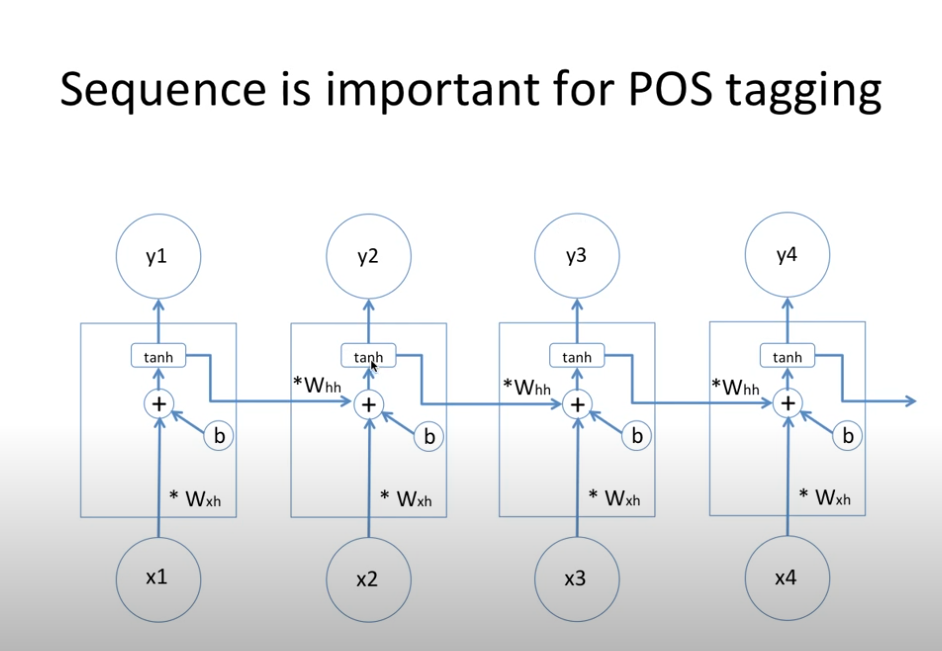

# h2를 예를 들자면,

h2의 값은 아래 **세 가지 값**들을 더한 값이다.

- h1 x whh = 과거의 state와 가중치가 곱해진 값
- x2 x wxh = 현재의 입력 값과 가중치가 곱해진 값
- bias = 편향값

한마디로 **두 가지(과거 + 현재)** 상황을 **고려( + )**한 값이다.

마지막으로, **tanh (활성화 함수)**를 넣어 줌으로써, **비선형성**을 부과시켜준다.


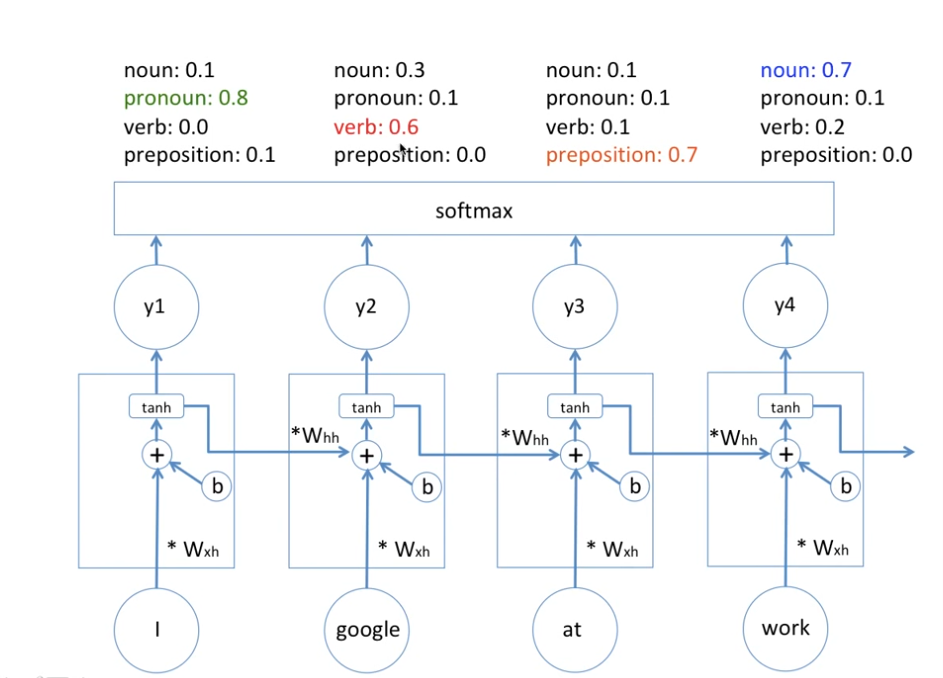

- RNN은 supervised learning이다.
- 정답 값들을 알기 때문에 네 개의 클래스를 가지고 있다고 알고 있다.

- 가장 높은 확률 값을 그 클래스라고 분류한다.

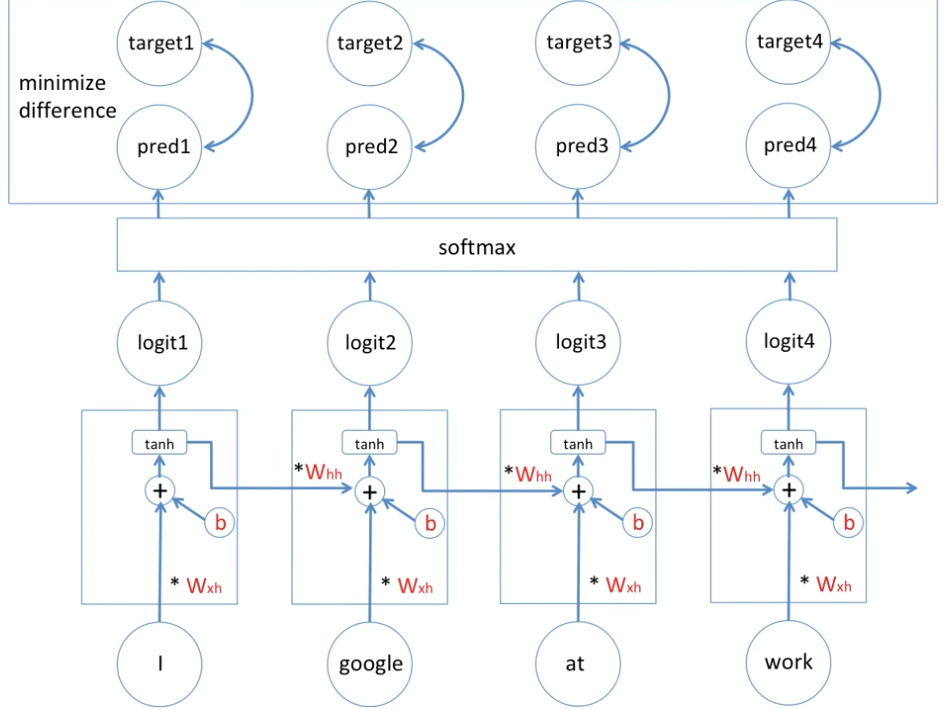

- 예측 값(pred)와 정답(target)의 차이를 줄여나가는 과정을 학습 과정이라고 한다.

- 줄여 나가는 과정에서 Wxh와 Whh, b의 값을 최적화해준다. 여기서 최적화시킨 다는 말은 조금씩 변형(Gradient Descent)시켜준다.

- Wxh와 Whh는 위에서 세번이나 나오지만, 하나의 변수로 취급한다. 마찬가지로 b도 여러번 나오지만 하나의 변수로 취급한다.

- 여러 변수가 아니라 하나의 변수의 변형이기 때문에 backpropagation이라고 안하고, 각 타임 시리즈마다 있는 동일한 변수로 바꾸는 것이기 때문에 Backpropagation Through Time 줄여서 BPTT라고 부르기도 한다.

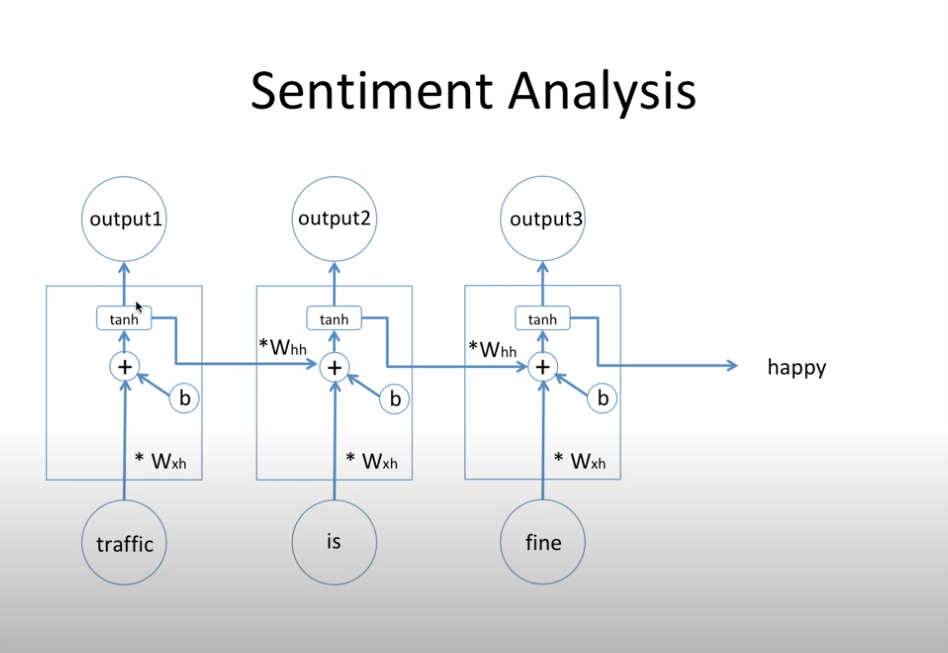

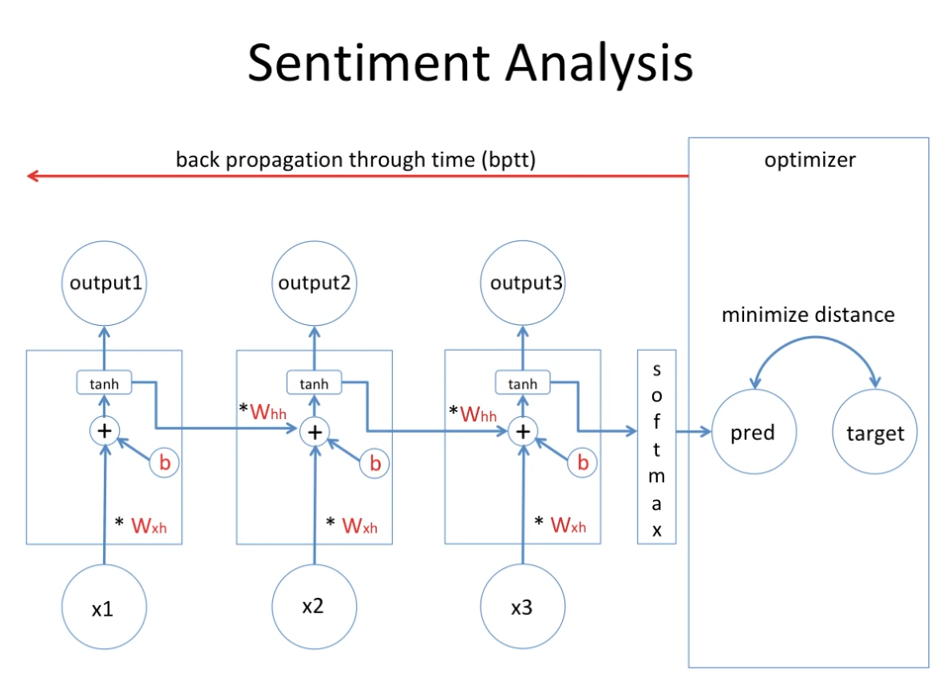

- 마지막 state 값이 output보다 중요하기 때문에 소프트맥스가 state에 붙어 있는 것을 주목한다.

# Long Short-Term Memory (LSTM)

[ LSTM 개념 이해를 위한 출처 : https://www.youtube.com/watch?v=bX6GLbpw-A4&list=PLVNY1HnUlO24lnGmxdwTgfXkd4qhDbEkG&index=15 ]

RNN은 긴 시퀀스 데이터를 다룰 때 문제가 많았다. 특히, Long-term dependency 문제 때문이다.

Long-term dependency란, 시퀀스가 길어질 수록 정보가 뒤로 잘 전달되지 않는 문제를 말한다.

예를 들어,

- "나는 아침에 **커피**를 마셨다...... 그래서 지금 **기분**이 매우 좋다."

라는 문장이 있을때 **커피**와 **기분** 의 **관계**를 기억하지 못한다.
초반에 입력된 정보가 뒤로 갈 수록 희미해져서, 멀리 떨어진 단어와의 관계를 잘 기억하지 못하는 것이다.






# 이런 문제가 생기는 이유는

 기울기가 너무 작아져서 0에 가까워지거나(Gradient Vanishing), 1보다 커지면(Gradient Exploding) 과거의 정보가 뒤에 모듈에 전달이 잘 되지 않기 때문이다.

아래의 예시를 보고 알아보자.

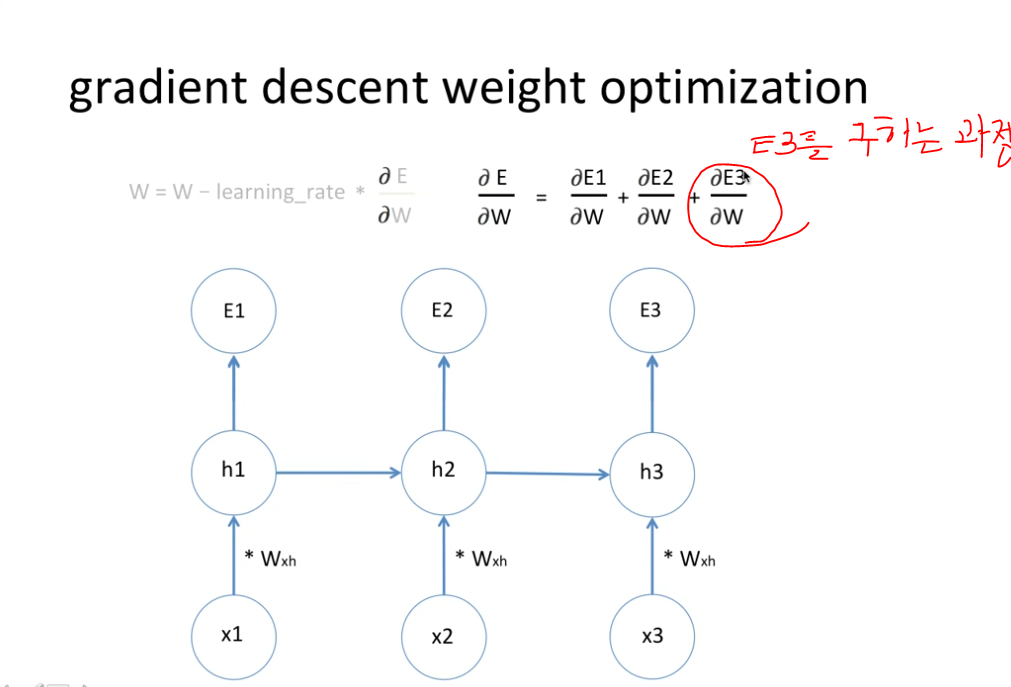

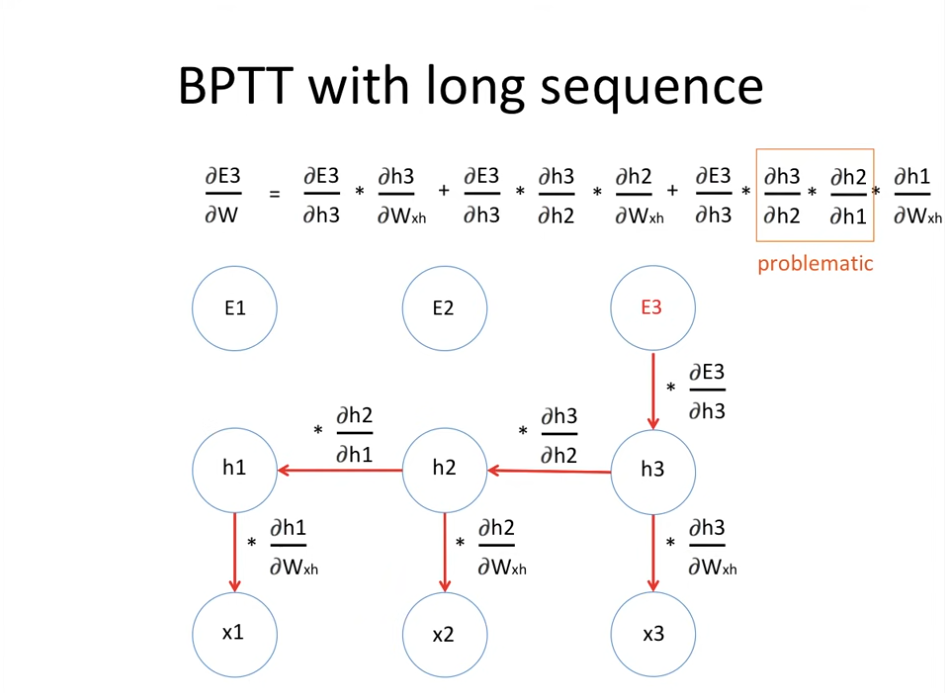

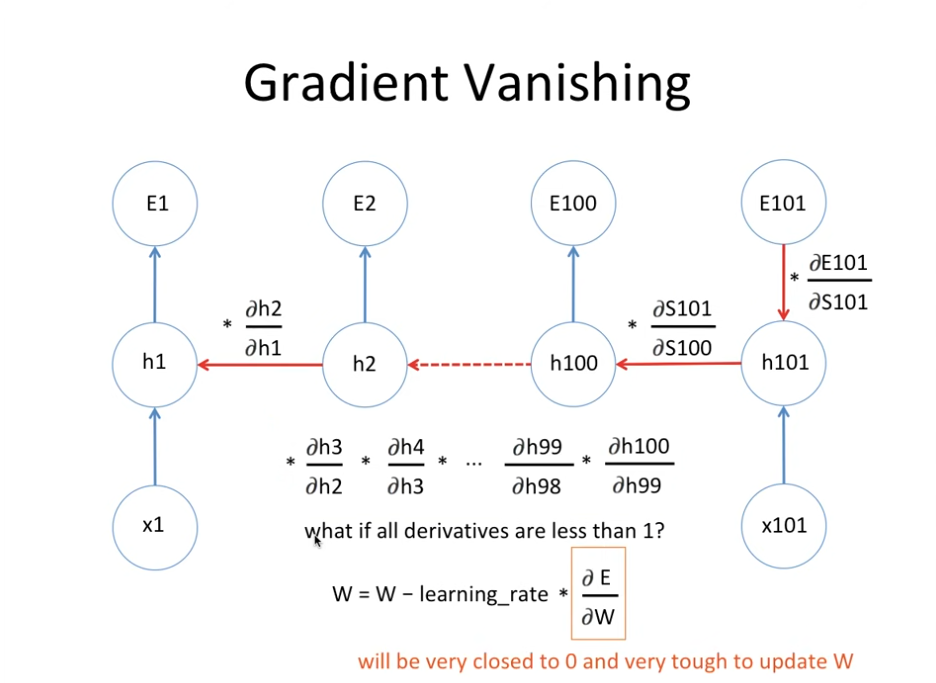

곱하는 값들이 0에 가깝다면, 100 번 곱했을 때 0에 가까운 값이 될 것이다. 그렇게 되면 기존의 Weight value와 거의 차이가 없을 것이다.

# 어떻게 0에 가까워질까 ?

위에 RNN에서 보면 다음 스테이트의 값은 **Wxh와 Whh가 곱해진 값**이다.

예를 들어
- 5, 10, 100개의 스테이트
- w = 0.9

5단계는 image.png


10단계는 image.png

100단계는 image.png

로 0에 가까워진다.

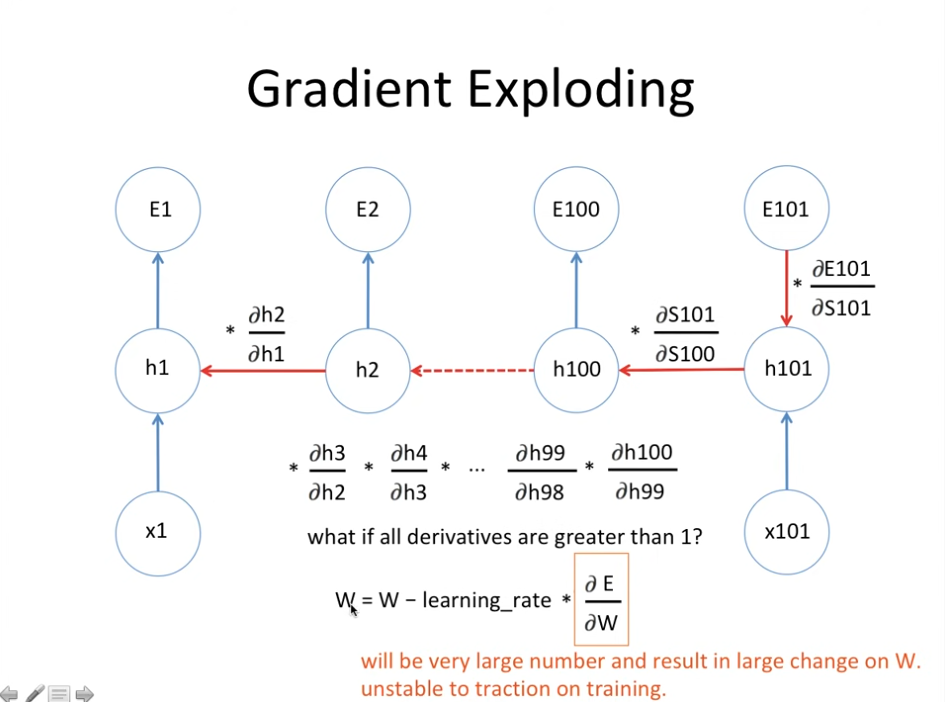

- Gradient Vanishing 문제와 마찬가지로 뒤로 갈 수록 값이 커진다.

- RNN은 이러한 문제 때문에 긴 문장에서 비효율적이다.


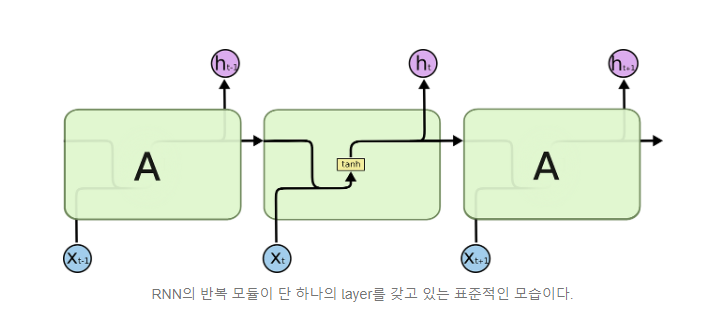

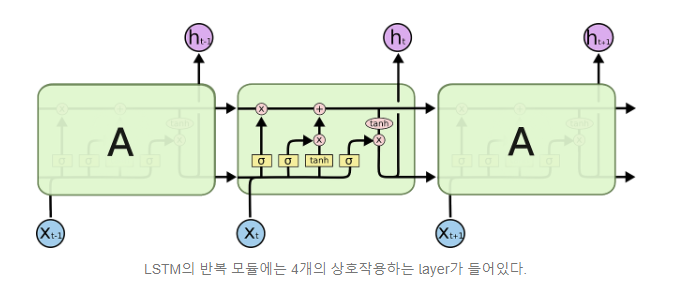

LSTM은 RNN의 Cell State(셀 상태)에다가 Gate Mechanism(게이트 구조)를 추가해서 이러한 장기 의존성 문제를 해결한다.

- 셀 상태
  - 정보를 장기적으로 기억하는 경로
  - 이 경로를 통해 정보가 직접 전달 되기 때문에 RNN보다 정보를 오래 기억할 수 있다.

- 게이트 구조
  - 망각 게이트(Forget Gate): 필요 없는 정보를 지우기
  - 입력게이트(Input Gate): 새로운 정보를 저장할지 결정
  - 출력 게이트(Output Gate):다음 단계로 어떤 정보를 보낼지 결정

# Forget Gate (망각 게이트)

과거의 정부에서 필요없는 정보들을 지우는 것을 수학적으로 표현한 것이다.

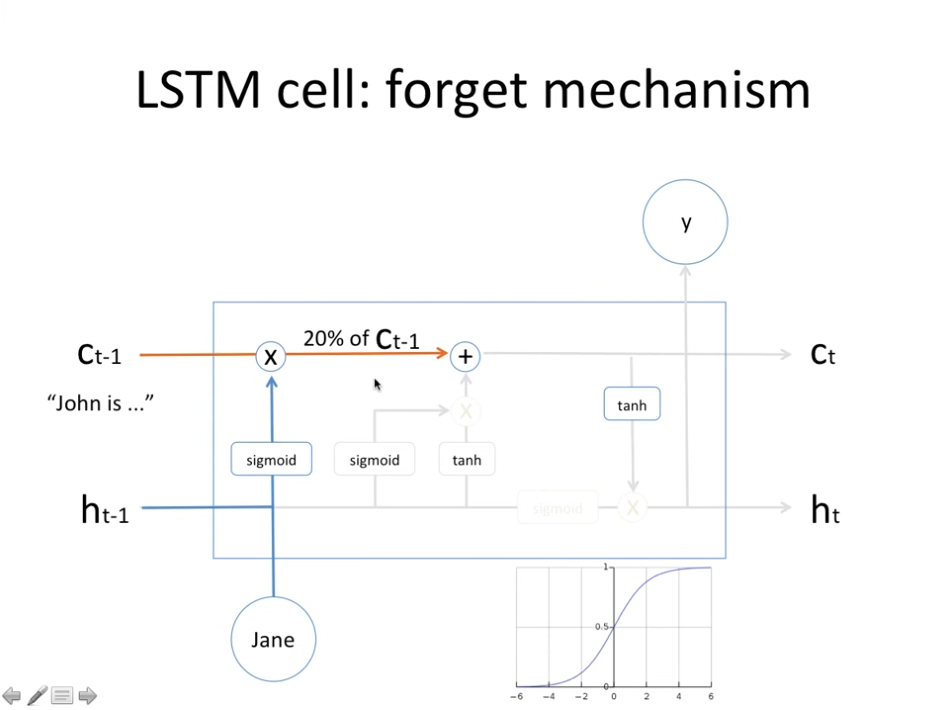

- Ct-1 : 과거의 문장들
- Jane : 새로운 정보
- ht-1 : 이전의 히든 스테이트
- sigmoid : 몇 퍼센트 기억하게 할 것인지 (* 값 0 ~ 1사이 값)

사진에서는
- Jane이라는 입력이 들어왔을 때, 과거의 정보는 20프로만 남겨라 라는 뜻이다.




# Input Gate (입력 게이트)


과거의 정보는 어느정도 잊었고, 새로운 정보를 메모리 셀에 더해주는 과정(+)이다.

한 마디로, 이 정보는 기억해야돼 !

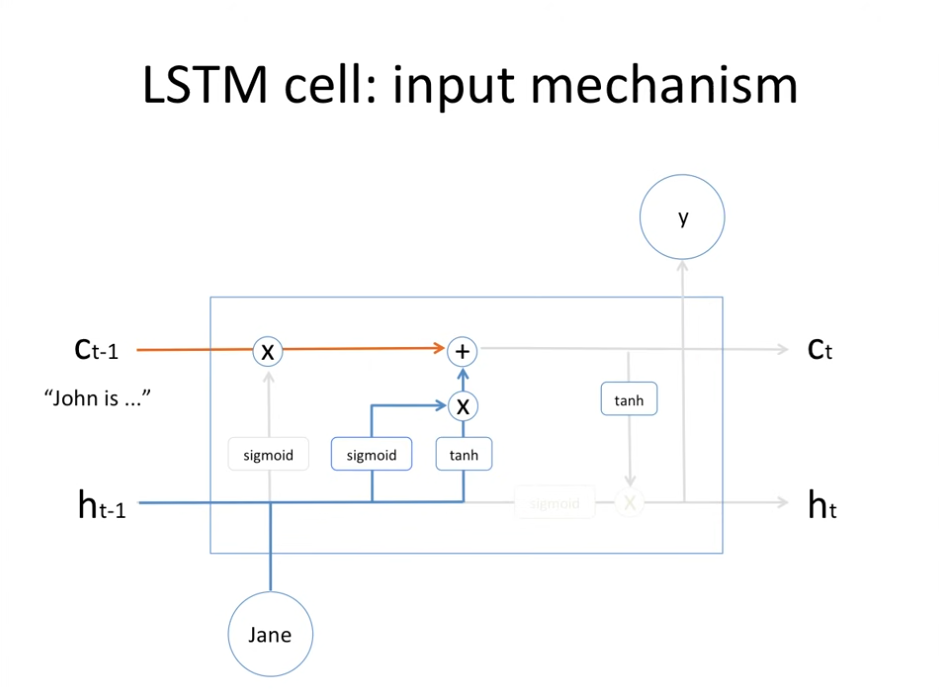

hiddent state에서 온 **과거의 가중치와 절편** 그리고 **현재 입력(Jane)의 가중치와 절편**이 들어와서 수학적으로 곱해주고, **이 값**들(새로운 값)을 **메모리 셀에 더해준다**.

# Output Gate(출력 게이트)

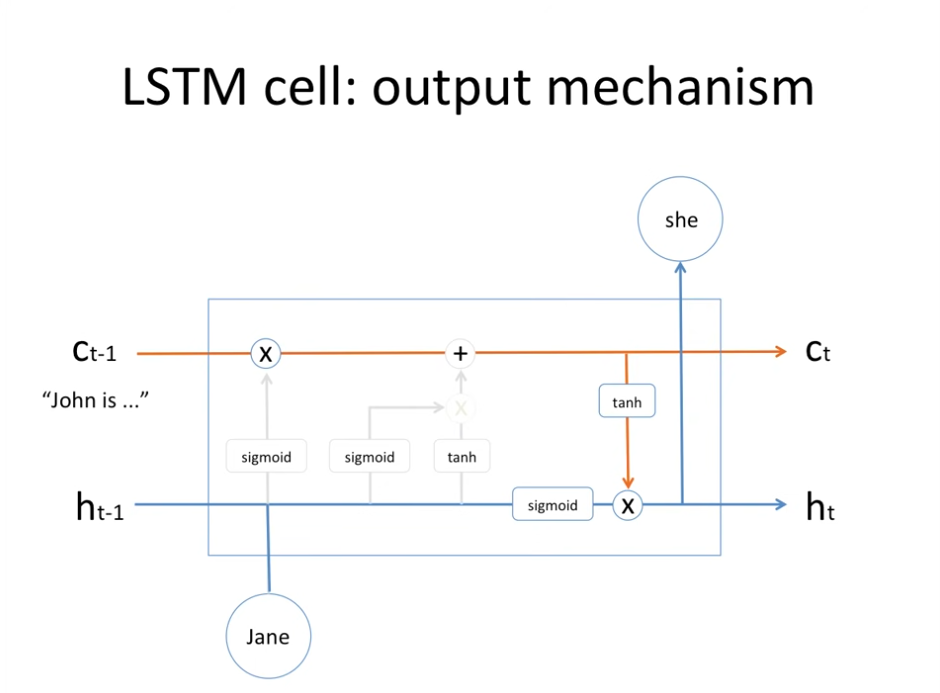

마지막으로 메모리 셀에 정보가 tanh를 통해서 들어오고, hidden stat와 현재의 정보가 서로 들어아서 곱한다. 그리고 다음 hidden state로 넘어간다.

In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms


# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters
sequence_length = 28 # 히든 상태와 메모리 셀을 가진 시퀀스의 개수
input_size = 28
hidden_size = 128
num_layers = 2
num_classes = 10
batch_size = 100
num_epochs = 2
learning_rate = 0.01





- sequnce_legnth

  - Mnist 이미지는 28 x 28 이므로,

  - 첫번째 시퀀스 -> 이미지 28개의 픽셀(1행)을 LSTM에 입력 -> 히든 상태와 셀 상태 업데이트
  - 두번째 시퀀스 -> 이미지 28개의 픽셀(2행)을 입력 -> 이전 히든 상태와 셀 상태를 이어서 히든 상태와 셀상태를 업데이트
  - ....
  - 28번째 시퀀스 -> 이미지 28개의 픽셀(3행)을 입력 -> 이미지 전체 정보를 압축한 상태가 된다.

  - 최종 히든 상태를 FC 레이어에 전달해, 0-9까지 숫자를 예측한다.

- input_size
  -  이미지 픽셀의 개수(이미지의 행)는 28개

- num_layers
  - 1층에서 28번의 시퀀스를 처리하고 그 출력을 2층에 넘겨준다
  - 2층에서 또 28번의 시퀀스를 처리한다.

  - 층이 여러 개일 수록 더 고차원적인 특징을 학습할 수 있다.

- hidden_size
  - 히든 상태 벡터의 차원 수를 설정하는 파라미터이다.
  - hidden_size = 128일때, 모델은 각 시퀀스에서 128개의 값을 통해 정보를 표현하고 학습한다.
  - 값이 크면 : 각 시간 단계에서 더 많은 정보를 저장할 수 있기 때문에, 더 복잡한 패턴을 학습할 수 있다.
  - 값이 작으면 : 모델의 표현 능력이 제한되어, 간단한 패턴만 학습할 수 있다.

  




In [2]:
# MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='../data/',
                                           train=True,
                                           transform=transforms.ToTensor(),
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='../data/',
                                          train=False,
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

100%|██████████| 9.91M/9.91M [00:00<00:00, 16.2MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 506kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 3.91MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 7.87MB/s]


In [3]:
# Recurrent neural network (many-to-one)
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(RNN, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        # Set initial hidden and cell states
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)

        # Forward propagate LSTM
        out, _ = self.lstm(x, (h0, c0))  # out: tensor of shape (batch_size, seq_length, hidden_size)

        # Decode the hidden state of the last time step
        out = self.fc(out[:, -1, :]) # -> 다대일(Many to One)이기 때문에 마지막 sequence만 필요하다. 앞에 시퀀스의 구조를 확인할 것
        return out

model = RNN(input_size, hidden_size, num_layers, num_classes).to(device)




- nn.Linear(hidden_size, num_class)

  - 여기서 hidden이 들어가는 이유는 LSTM이 시퀀스를 처리하면서 히든 상태를 점차적으로 갱신한다. 최종적으로,  LSTM의 마지막 타임 스텝에서 나온 최종 히든 상태(output)를 가지고 클래스 레이블(num_classes)에 대한 예측 값으로 변환한다.

- h0 : hidden states
- c0 : Memory Cells

- out = self.fc(out[:, -1, :])
  - 다대일(Many to One)이기 때문에 마지막 sequence만 필요하다.
  - 첫 번째 시퀀스부터 28번째 시퀀스까지 hidden state의 이전의 정보와 현재 정보가 누적되면서 업데이트 되기 때문에 마지막 sequence에 한 이미지 배치에 대한 모든 정보가 들어있다. 그래서 마지막 sequence만 필요한 거다.

In [4]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1, sequence_length, input_size).to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

# Test the model
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, sequence_length, input_size).to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Test Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total))

# Save the model checkpoint
torch.save(model.state_dict(), 'model.ckpt')

Epoch [1/2], Step [100/600], Loss: 0.5941
Epoch [1/2], Step [200/600], Loss: 0.3220
Epoch [1/2], Step [300/600], Loss: 0.1643
Epoch [1/2], Step [400/600], Loss: 0.0896
Epoch [1/2], Step [500/600], Loss: 0.1317
Epoch [1/2], Step [600/600], Loss: 0.0802
Epoch [2/2], Step [100/600], Loss: 0.0973
Epoch [2/2], Step [200/600], Loss: 0.0389
Epoch [2/2], Step [300/600], Loss: 0.0629
Epoch [2/2], Step [400/600], Loss: 0.1214
Epoch [2/2], Step [500/600], Loss: 0.1162
Epoch [2/2], Step [600/600], Loss: 0.1494
Test Accuracy of the model on the 10000 test images: 97.88 %
